In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("breast_cancer.csv")

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
data.shape

(569, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

In [7]:
from collections import Counter

In [8]:
Counter(data.outcome)

Counter({1: 212, 0: 357})

### Feature Analysis, Selection and Engineering 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

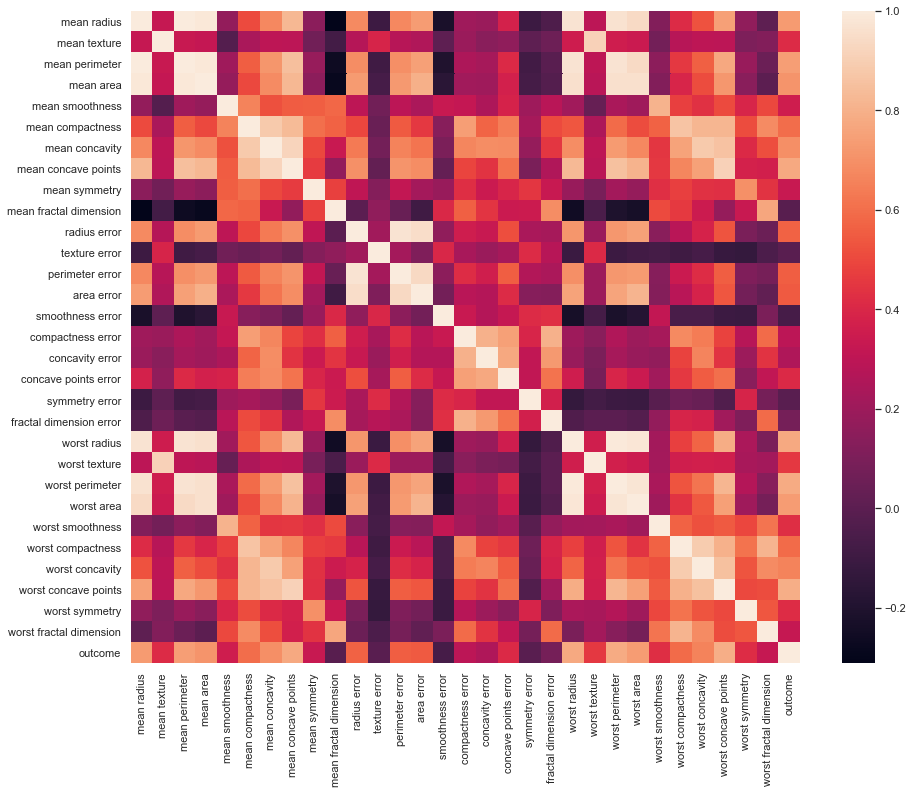

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr());

In [52]:
def filter_highlow_corr(data, limit=0.8):
    """
    Returns a list of column names to be deleted in order to tackle the problem of high correlation.
    data: DataFrame, whose highly correlated features are to be removed.
    limit: float, the maximum allowable correlation between the features.
    """
    correl = abs(data.corr()) # correlation dataframe 
    outcome = correl.iloc[:-1,-1]
    correl = correl.iloc[:-1, :-1]  #target correlation column
    col_list = []
    low_correlation = list(outcome.index[outcome < 0.01])
    [col_list.append(i) for i in low_correlation]
    correl.replace(1.0, 0, inplace=True)
    correl_tf = correl >= limit
    cor = correl[correl_tf].fillna(0)
    list_of_high = []
    max_list = []
    
    for col in cor.columns:
        ind = cor[col].index[cor[col] != 0]
        list_of_high.append(list(ind))
        if not len(list(ind)):
            max_list.append(col)    
    
    for high in list_of_high:
        if len(high):
            highest = outcome[high].max()
            max_list.append(outcome[outcome == highest].index[0])
    
    max_list = set(max_list)
    col_filtered = list(set(data.columns).difference(max_list))
    [col_filtered.append(c) for c in col_list]
    df = data.drop(col_filtered, axis=1)
    
    return  df

In [53]:
df = filter_highlow_corr(data)

In [55]:
df.shape

(569, 17)

We have dropped 13 features because they were either too highly correlated to a feature or was not correlated to the label at all.

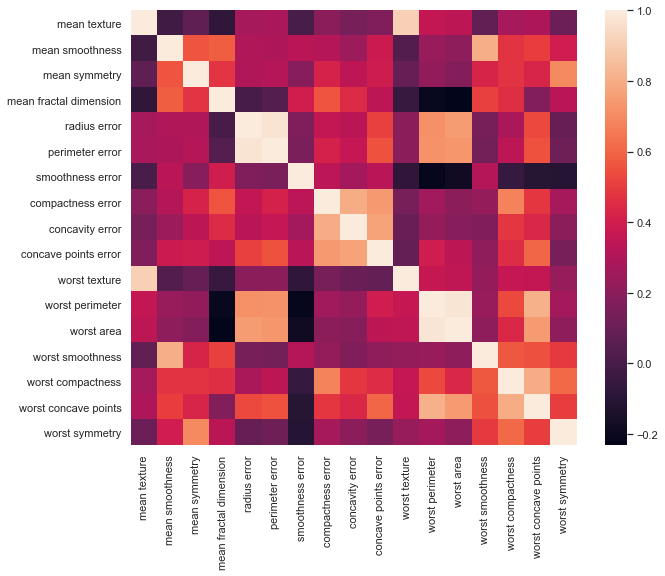

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());

In [58]:
df.corr()

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,radius error,perimeter error,smoothness error,compactness error,concavity error,concave points error,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concave points,worst symmetry
mean texture,1.000000,-0.023389,0.071401,-0.076437,0.275869,0.281673,0.006614,0.191975,0.143293,0.163851,0.912045,0.358040,0.343546,0.077503,0.277830,0.295316,0.105008
mean smoothness,-0.023389,1.000000,0.557775,0.584792,0.301467,0.296092,0.332375,0.318943,0.248396,0.380676,0.036072,0.238853,0.206718,0.805324,0.472468,0.503053,0.394309
mean symmetry,0.071401,0.557775,1.000000,0.479921,0.303379,0.313893,0.187321,0.421659,0.342627,0.393298,0.090651,0.219169,0.177193,0.426675,0.473200,0.430297,0.699826
mean fractal dimension,-0.076437,0.584792,0.479921,1.000000,0.000111,0.039830,0.401964,0.559837,0.446630,0.341198,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.175325,0.334019
radius error,0.275869,0.301467,0.303379,0.000111,1.000000,0.972794,0.164514,0.356065,0.332358,0.513346,0.194799,0.719684,0.751548,0.141919,0.287103,0.531062,0.094543
perimeter error,0.281673,0.296092,0.313893,0.039830,0.972794,1.000000,0.151075,0.416322,0.362482,0.556264,0.200371,0.721031,0.730713,0.130054,0.341919,0.554897,0.109930
smoothness error,0.006614,0.332375,0.187321,0.401964,0.164514,0.151075,1.000000,0.336696,0.268685,0.328429,-0.074743,-0.217304,-0.182195,0.314457,-0.055558,-0.102007,-0.107342
compactness error,0.191975,0.318943,0.421659,0.559837,0.356065,0.416322,0.336696,1.000000,0.801268,0.744083,0.143003,0.260516,0.199371,0.227394,0.678780,0.483208,0.277878
concavity error,0.143293,0.248396,0.342627,0.446630,0.332358,0.362482,0.268685,0.801268,1.000000,0.771804,0.100241,0.226680,0.188353,0.168481,0.484858,0.440472,0.197788
concave points error,0.163851,0.380676,0.393298,0.341198,0.513346,0.556264,0.328429,0.744083,0.771804,1.000000,0.086741,0.394999,0.342271,0.215351,0.452888,0.602450,0.143116


In [63]:
cor_matrix = (data.iloc[:, :-1]).corr().abs()

In [64]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

In [65]:
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]

In [68]:
df1 = data.drop(to_drop, axis=1)

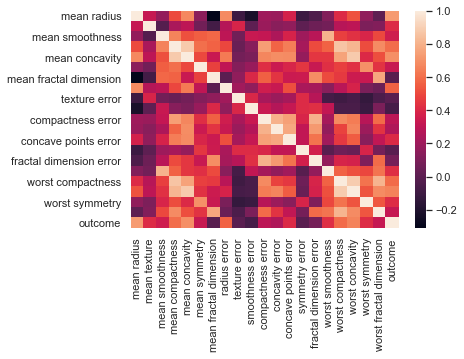

In [70]:
sns.heatmap(df1.corr());